In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/weatheraus/weatherAUS.csv


In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, cross_val_score
from keras.models import Sequential
from keras.layers import LSTM ,Dense, Dropout

In [24]:
node1=pd.read_csv("/kaggle/input/weatheraus/weatherAUS.csv")

In [25]:
node1.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [26]:
node1.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [27]:
node1.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

In [28]:
node1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [29]:
node1.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [30]:
node1.replace(np.NaN, 0,inplace=True)
node1=node1.replace({'Yes':1,'No':0})
#node1.replace(np.yes,1,inplace=True)

In [31]:
correlation =node1.corr()

<AxesSubplot:>

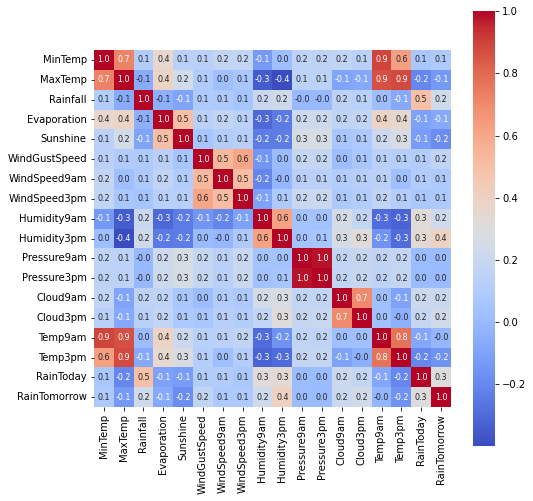

In [32]:
plt.figure(figsize =(8,8))
sns.heatmap(correlation ,cbar=True ,square=True ,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')

In [33]:
print(correlation['Rainfall'])

MinTemp          0.103082
MaxTemp         -0.067070
Rainfall         1.000000
Evaporation     -0.053597
Sunshine        -0.096489
WindGustSpeed    0.092382
WindSpeed9am     0.084272
WindSpeed3pm     0.051958
Humidity9am      0.200255
Humidity3pm      0.224988
Pressure9am     -0.000629
Pressure3pm     -0.000613
Cloud9am         0.150567
Cloud3pm         0.126678
Temp9am          0.012564
Temp3pm         -0.072184
RainToday        0.502807
RainTomorrow     0.233877
Name: Rainfall, dtype: float64


In [34]:
X = node1.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow'],axis=1)
Y = node1['RainTomorrow']
print(X)

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          0.0       0.0           44.0   
1           7.4     25.1       0.0          0.0       0.0           44.0   
2          12.9     25.7       0.0          0.0       0.0           46.0   
3           9.2     28.0       0.0          0.0       0.0           24.0   
4          17.5     32.3       1.0          0.0       0.0           41.0   
...         ...      ...       ...          ...       ...            ...   
145455      2.8     23.4       0.0          0.0       0.0           31.0   
145456      3.6     25.3       0.0          0.0       0.0           22.0   
145457      5.4     26.9       0.0          0.0       0.0           37.0   
145458      7.8     27.0       0.0          0.0       0.0           28.0   
145459     14.9      0.0       0.0          0.0       0.0            0.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         

In [35]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64


In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
import time
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precission:",metrics.precision_score(y_test, y_pred,average='weighted'))
    print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Time',et-st)
    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

Accuracy: 0.7817269352399285
Precission: 0.7840879333550428
Recall: 0.7817269352399285
Time:  2.0681402683258057
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22672
           1       0.51      0.52      0.51      6420

    accuracy                           0.78     29092
   macro avg       0.68      0.69      0.69     29092
weighted avg       0.78      0.78      0.78     29092



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


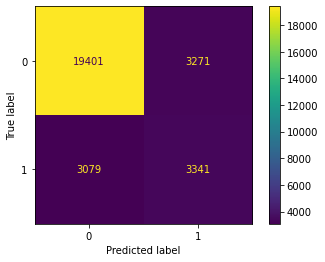

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
classify(model)

Accuracy: 0.8444589577890829
Precission: 0.8342277401617811
Recall: 0.8444589577890829
Time:  70.98719549179077
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22672
           1       0.74      0.45      0.56      6420

    accuracy                           0.84     29092
   macro avg       0.80      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


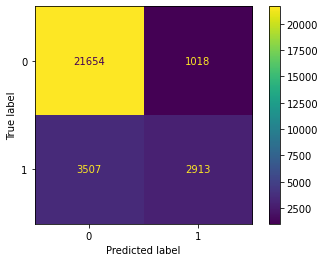

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=35)
classify(model)

Accuracy: 0.824487831706311
Precission: 0.8160657671027317
Recall: 0.824487831706311
Time:  12.215686798095703
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     22672
           1       0.77      0.29      0.42      6420

    accuracy                           0.82     29092
   macro avg       0.80      0.63      0.66     29092
weighted avg       0.82      0.82      0.79     29092



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


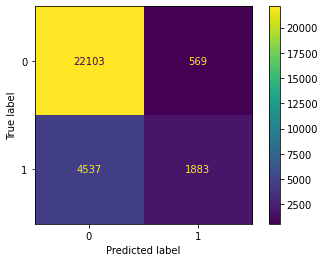

In [39]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150,max_depth=3)
classify(model)

Accuracy: 0.8420184243090885
Precission: 0.8308829510377931
Recall: 0.8420184243090885
Time:  16.709434747695923
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.72      0.47      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


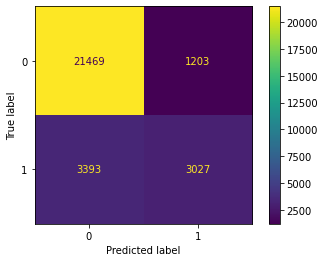

In [40]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=7)
classify(model)

Accuracy: 0.8341468444933315
Precission: 0.821189639112648
Recall: 0.8341468444933315
Time:  37.12678909301758
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22672
           1       0.71      0.43      0.53      6420

    accuracy                           0.83     29092
   macro avg       0.78      0.69      0.72     29092
weighted avg       0.82      0.83      0.82     29092



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


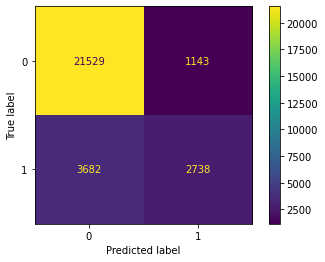

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
classify(model)

In [42]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)

estimators = []

model1 = DecisionTreeClassifier(criterion='gini')
estimators.append(('cart', model1))
model2 = LogisticRegression(max_iter=5000)
estimators.append(('LR', model2))
model3 = KNeighborsClassifier(n_neighbors=35)
estimators.append(('KNN', model3))
model4 = RandomForestClassifier(n_estimators=150,max_depth=3)
estimators.append(('RF', model4))
model5 = AdaBoostClassifier(n_estimators=100, random_state=7)
estimators.append(('AdB', model5))


# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.841757184105596


**processed dataset-1**

In [43]:
X = node1.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow','MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm'],axis=1)
Y = node1['RainTomorrow']

In [44]:
print(X)

        Evaporation  RainToday
0               0.0          0
1               0.0          0
2               0.0          0
3               0.0          0
4               0.0          0
...             ...        ...
145455          0.0          0
145456          0.0          0
145457          0.0          0
145458          0.0          0
145459          0.0          0

[145460 rows x 2 columns]


In [45]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64


In [46]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
import time
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precission:",metrics.precision_score(y_test, y_pred,average='weighted'))
    print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Time',et-st)
    plot_confusion_matrix(model, x_test, y_test)
    plt.show()
    


Accuracy: 0.7796645125807782
Precission: 0.7238123562392826
Recall: 0.7796645125807782
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.88     22672
           1       0.52      0.02      0.04      6420

    accuracy                           0.78     29092
   macro avg       0.65      0.51      0.46     29092
weighted avg       0.72      0.78      0.69     29092



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


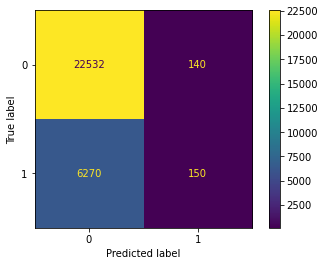

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
classify(model)

Accuracy: 0.7684930565103809
Precission: 0.7382105734040216
Recall: 0.7684930565103809
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     22672
           1       0.46      0.28      0.35      6420

    accuracy                           0.77     29092
   macro avg       0.64      0.59      0.60     29092
weighted avg       0.74      0.77      0.75     29092



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


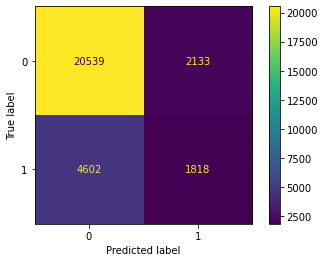

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=35)
classify(model)

Accuracy: 0.7793207754709198
Precission: 0.6073408710805958
Recall: 0.7793207754709198
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     22672
           1       0.00      0.00      0.00      6420

    accuracy                           0.78     29092
   macro avg       0.39      0.50      0.44     29092
weighted avg       0.61      0.78      0.68     29092



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: 

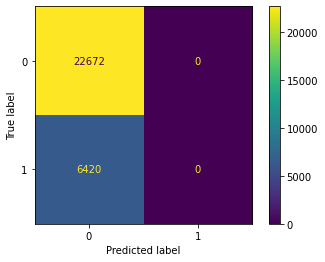

In [49]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150,max_depth=3)
classify(model)

Accuracy: 0.779286401759934
Precission: 0.6073349592898568
Recall: 0.779286401759934
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     22672
           1       0.00      0.00      0.00      6420

    accuracy                           0.78     29092
   macro avg       0.39      0.50      0.44     29092
weighted avg       0.61      0.78      0.68     29092



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


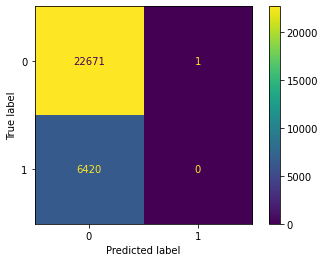

In [50]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=7)
classify(model)

Accuracy: 0.7793207754709198
Precission: 0.6073408710805958
Recall: 0.7793207754709198
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     22672
           1       0.00      0.00      0.00      6420

    accuracy                           0.78     29092
   macro avg       0.39      0.50      0.44     29092
weighted avg       0.61      0.78      0.68     29092



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: 

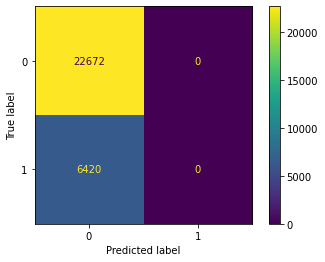

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
classify(model)

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)

estimators = []

model1 = DecisionTreeClassifier(criterion='gini')
estimators.append(('cart', model1))
model2 = LogisticRegression(max_iter=5000)
estimators.append(('LR', model2))
model3 = KNeighborsClassifier(n_neighbors=35)
estimators.append(('KNN', model3))
model4 = RandomForestClassifier(n_estimators=150,max_depth=3)
estimators.append(('RF', model4))
model5 = AdaBoostClassifier(n_estimators=100, random_state=7)
estimators.append(('AdB', model5))


# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

In [ ]:
node1['avg'] = node1[['MinTemp', 'MaxTemp']].mean(axis=1)
node1

In [ ]:
def change_values(node1,avg,RainToday):
    for i in node1.index:
        val1=node1['avg'].iloc[i]
        val2=node1['RainToday'].iloc[i]
        if (val1>=15) and (val2==0):
            node1['RainTomorrow'].iloc[i]=1
        else:
            node1['RainTomorrow'].iloc[i]=0

change_values(node1,'avg','RainToday')

In [ ]:
node1

In [ ]:
X = node1.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow','MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Evaporation'],axis=1)
Y = node1['RainTomorrow']
print(X)
print(Y)

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
import time
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precission:",metrics.precision_score(y_test, y_pred,average='weighted'))
    print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Time',et-st)
    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
classify(model)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30)
classify(model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150,max_depth=3)
classify(model)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=7)
classify(model)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
classify(model)

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)

estimators = []

model1 = DecisionTreeClassifier(criterion='gini')
estimators.append(('cart', model1))
model2 = LogisticRegression(random_state=0)
estimators.append(('LR', model2))
model3 = KNeighborsClassifier(n_neighbors=35)
estimators.append(('KNN', model3))
model4 = RandomForestClassifier(n_estimators=150,max_depth=3)
estimators.append(('RF', model4))
model5 = AdaBoostClassifier(n_estimators=100, random_state=7)
estimators.append(('AdB', model5))


# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())